In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # important!
])

In [4]:
train_dataset=torchvision.datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)

In [5]:

test_dataset=torchvision.datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)

In [6]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [7]:
train_loader = DataLoader(train_dataset, batch_size=64,shuffle=True )

In [8]:
class generator(nn.Module):
    def __init__(self,hiddem):
        super().__init__()
        self.fc1=nn.Linear(hiddem,500)
        self.bn1=nn.BatchNorm1d(500)
        self.fc2=nn.Linear(500,1000)
        self.bn2=nn.BatchNorm1d(1000)
        self.fc3=nn.Linear(1000,28*28)
        self.rel=nn.LeakyReLU(0.1)
        self.tanh=nn.Tanh()
    def forward(self,x):
        x=self.rel(self.bn1(self.fc1(x)))
        x=self.rel(self.bn2(self.fc2(x)))
        return self.tanh(self.fc3(x))
        

In [12]:
class disc(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,300)
        self.fc2=nn.Linear(300,200)
        self.fc3=nn.Linear(200,1)
        self.rel=nn.LeakyReLU(0.1)
        self.sigm=nn.Sigmoid()
        self.drop=nn.Dropout(0.2)
    def forward(self,x):
        x=self.drop(self.rel(self.fc1(x)))
        x=self.drop(self.rel(self.fc2(x)))
        return self.sigm(self.fc3(x))

In [13]:
latentdim=100

In [14]:
gen=generator(latentdim)
dis=disc()

In [15]:
criterion=nn.BCELoss()

In [17]:
discoptim=optim.Adam(dis.parameters(),lr=0.0002)

In [18]:
genoptim=optim.Adam(gen.parameters(),lr=0.0002)

In [19]:
epoch=20

In [20]:
for i in range(epoch):
    for x,y in train_loader:
        batch_size=len(x)
        x=x.view(batch_size,-1)
        fakelat=torch.randn(batch_size,latentdim)
        fakeimg=gen(fakelat)
        fakeres=dis(fakeimg.detach())
        realres=dis(x)
        ones=torch.ones(batch_size,1)
        zero=torch.zeros(batch_size,1)
        loss_dis1=criterion(fakeres,zero)
        loss_dis2=criterion(realres,ones)
        loss=(loss_dis1+loss_dis2)/2
        discoptim.zero_grad()
        loss.backward()
        discoptim.step()
        newfakes=dis(fakeimg)
        loss_gen=criterion(newfakes,ones)
        genoptim.zero_grad()
        loss_gen.backward()
        print(f"Epoch number {i} Disc loss is {loss} and gen loss is {loss_gen}")
        genoptim.step()
        
        
        

Epoch number 0 Disc loss is 0.685605525970459 and gen loss is 0.7104451656341553
Epoch number 0 Disc loss is 0.6726589798927307 and gen loss is 0.6750355958938599
Epoch number 0 Disc loss is 0.6579689979553223 and gen loss is 0.6424897313117981
Epoch number 0 Disc loss is 0.6501192450523376 and gen loss is 0.6056001782417297
Epoch number 0 Disc loss is 0.6548087000846863 and gen loss is 0.5669224262237549
Epoch number 0 Disc loss is 0.6518765687942505 and gen loss is 0.5383673906326294
Epoch number 0 Disc loss is 0.6581646203994751 and gen loss is 0.5138832330703735
Epoch number 0 Disc loss is 0.6585394144058228 and gen loss is 0.49236467480659485
Epoch number 0 Disc loss is 0.6669840812683105 and gen loss is 0.46781012415885925
Epoch number 0 Disc loss is 0.6673757433891296 and gen loss is 0.4616353213787079
Epoch number 0 Disc loss is 0.6608291864395142 and gen loss is 0.45898008346557617
Epoch number 0 Disc loss is 0.6778865456581116 and gen loss is 0.478948712348938
Epoch number 0 

In [21]:
genz1=torch.randn(30,latentdim)

In [22]:
outs=gen(genz1)

In [56]:
n1=outs[10]

In [57]:
o=n1.view(28,28).detach()

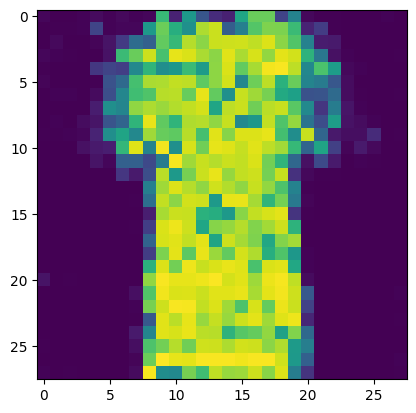

In [58]:
plt.imshow(o)